In [1]:
import pandas as pd

In [2]:
def find_title(name):
    return name.split(",")[1].split(".")[0].strip()

In [4]:
dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")
print(dfTrain.head())

dfTrain["Title"] = dfTrain["Name"].apply(find_title)
dfTest["Title"] = dfTest["Name"].apply(find_title)
print("Used Different Titles Are:")
print(pd.concat([dfTrain,dfTest],axis=0)["Title"].value_counts())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Us

In [5]:
other_list = ["Rev", "Dr", "Col", "Major", "Ms", "Mlle", "Jonkheer", "Lady", "Mme", "Dona", "Capt", "the Countess", "Sir", "Don"]
dfTrain["Title"] = dfTrain["Title"].replace(other_list, "Other")
dfTest["Title"] = dfTest["Title"].replace(other_list, "Other")
print("Used Different Titles Are:")
print(pd.concat([dfTrain,dfTest],axis=0)["Title"].value_counts())

Used Different Titles Are:
Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64


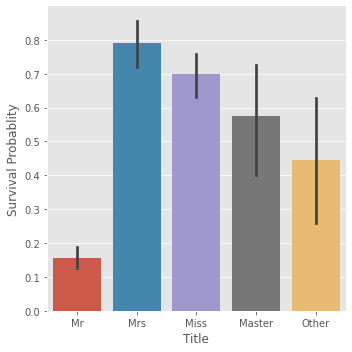

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")


g = sns.factorplot(x = "Title", y = "Survived", kind="bar", data=dfTrain, size = 5)
g.set_ylabels("Survival Probablity")
plt.show()

### Loading And Checking The Data

# dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")

print("\nTrain dataframe info\n")
dfTrain.info()
print("\nTest dataframe info\n")
dfTest.info()

In [19]:
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Description Of The Variables

#### Categorical variable analysis
    Labels: Survived, Pclass, Sex, SibSp, Parch, Embarked

#### Numerical variable analysis
    Labels: Age, Fare 



In [22]:
import plotly
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

def PlotPieChart(df,label):
    trace = go.Pie(labels=df[label])
    layout = dict(title = str(label))
    fig = dict(data=[trace], layout=layout)
    iplot(fig)

In [23]:
categoricalLabels = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for label in categoricalLabels:
    PlotPieChart(dfTrain,label)

#### Numerical Variable Analysis

In [25]:
import plotly.express as px
def PlotHistogram(df,label):
    fig = px.histogram(df, x=label)
    fig.show()

In [26]:
numericalLabels = ["Age", "Fare"]
for label in numericalLabels:
    PlotHistogram(dfTrain,label)

### Basic Data Analysis

In this section we will examine the relationships between the two labels based on the Description of the variables

These peer tags:

    Pclass -- Survived
    Sex -- Survived
    SibSp -- Survived
    Parch -- Survived


In [27]:
import plotly.express as px
def relationPieChart(df,value,name):
    fig = px.pie(df, values=value, names=name, title=str(value+" -- "+name))
    fig.show()

In [28]:
print("Surviving probability of Pclasses")
print(dfTrain[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False))
relationPieChart(dfTrain,"Survived","Pclass")

Surviving probability of Pclasses
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [29]:
print("Surviving probability of genders")
print(dfTrain[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending=False))
relationPieChart(dfTrain,"Survived","Sex")

Surviving probability of genders
      Sex  Survived
0  female  0.742038
1    male  0.188908


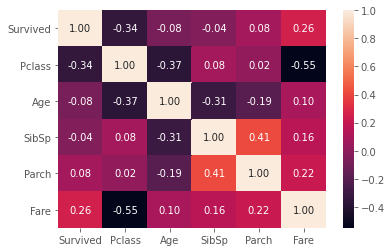

In [30]:
correlationList = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
sns.heatmap(dfTrain[correlationList].corr(), annot=True, fmt=".2f")